name, then

explanatory text

In [299]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [300]:
init = State(R=1000, L=0, E=0, V=0.0000004)

,values
R,1.000000e+03
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [301]:
gamma = 1.36
tau = 0.2
mu = 0.00136
beta = 0.00027 #per virion?
alpha = 0.036
delta = 0.33
pi = 100
sigma = 2
prop = 0.1
dt = 0.01

0.01

In [302]:
def dR(state):
    deriv = (gamma*tau-mu*state.R-beta*state.R*state.V)*dt
    return deriv

In [303]:
def dL(state):
    deriv = (prop*beta*state.R*state.V-mu*state.L-alpha*state.L)*dt
    return deriv

In [304]:
def dE(state):
    deriv = ((1-prop)*beta*state.R*state.V+alpha*state.L-delta*state.E)*dt
    return deriv

In [305]:
def dV(state):
    deriv = (pi*state.E-sigma*state.V)*dt
    return deriv

In [313]:
system = System(dR=dR, dL=dL, dE=dE, dV=dV, t0=0, t_end=1800)

,values
dR,<function dR at 0x000001DC242429D8>
dL,<function dL at 0x000001DC24029F28>
dE,<function dE at 0x000001DC240298C8>
dV,<function dV at 0x000001DC242427B8>
t0,0
t_end,1800


In [314]:
def update_func(state, t, system):
    R= dR(state)
    L= dL(state)
    E= dE(state)
    V= dV(state)
    state.R += R
    state.L+=L
    state.E+=E
    state.V+=V
    return state

In [315]:
def run_simulation(state, system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    frame = TimeFrame(columns=state.index)
    frame.row[system.t0] = state
    
    for t in linrange(system.t0, system.t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [324]:
def plot_results(w,x,y,z):
   
    plot(w, '--', label='R')
    plot(x, '-', label='L')
    plot(y, '--', label='E')
    plot(z, '-', label='V')
    decorate(xlabel='Time (hundredths of a day)',
             ylabel='Cell population')

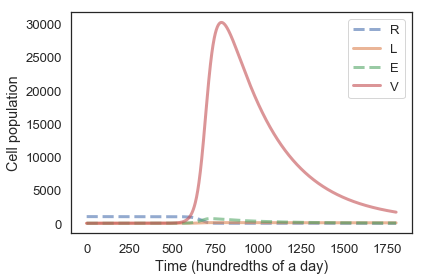

In [325]:
results = run_simulation(init, system, update_func)
plot_results(results.R,results.L,results.E, results.V)